# Trabajo de análisis de imágenes
### Autores: Laura Lucendo y Guillermo Valle

El trabajo propuesto ha sido la clasificación de un conjunto de imágenes de famosos y la realización de clustering de esas imágenes.

Para poder ejecutar este notebook es necesario tener una serie de librerías. En el caso del proyecto se ha utilizado conda como gestor de paquetes y se han generado dos ficheros .yml con todas las librerías necesarias para ejecutar el notebook. Se han tenido varios problemas para unificar de un solo entorno que funcione en macintosh y en Windows al mismo tiempo, por lo que se han realizado un fichero .yml para cada plataforma. Los siguientes comandos se tienen que ejecutar en el terminal (Windows: anaconda prompt o miniconda prompt):
- Macintosh:
    	```conda env create -f environment_mac.yml -n images_env```
- Windows:
        ```conda env create -f environment_windows.yml -n images_env```

## 1. Descarga de imágenes de Google

El dataset con el que se comenzó a trabajar es un dataset de Kaggle que se encuentra en el siguiente [link](https://www.kaggle.com/dansbecker/5-celebrity-faces-dataset), y contiene las imágenes de 5 famosos. Puesto a que se disponía de un número reducido de imágenes, se ha creado un script de descarga de imágenes de Google para poder ampliar nuestro dataset para el posterior entrenamiento de la red.
Este módulo tiene el código necesario para la descarga de imágenes de Google según las indicaciones que se le pasen a la función 'get_new_images()'. En caso de querer obtener más información se puede ver el script **'google_images.py'** del proyecto.
Para poder ejecutar este módulo es necesario tener el chromedriver descargado o instalado para poder abri chrome a través de la librería selenium. En el siguiente [link](https://www.notion.so/Chuleta-6-Chromedriver-a73835df5e304c3cbd73b6d8cc2cd40c) se tiene una guía de como instalar chromedriver, nosotros recomendamos descargar el chromedriver en función de la versión de Chrome instalada en el ordenador y guardarlo en la ruta raíz del proyecto (junto a los ficheros .py y .ipynb).

In [ ]:
# Carga de la clase y creación de la instancia
from google_images import GOOGLE_IMAGES
google_img = GOOGLE_IMAGES()

In [ ]:
# Descarga de las imágenes de los famosos que se quieran tener
google_img.get_new_images(search_keyword = ['Messi', 'Beyonce','Shakira','Sara Carbonero','Miley Cyrus'], visible= False)

# Ejemplo de ejecución con path
# google_img.get_new_images(search_keyword = ['Messi', 'Beyonce','Shakira','Sara Carbonero','Miley Cyrus'], visible= False, path='/Users/lauralucendomaranes/Documents/GitHub/MBD_image/chromedriver')

Cuando se han descargado las imágenes se realiza una revisión rápida y se pasan las mismas a las carpetas de las rutas 'archive/data/train' y 'archive/data/val' para tener en el dataset otra persona pública más. Este proceso se puede hacer manual o se puede realizar al ejecutar el siguiente comando que llama a la función 'move_new_images()'. Este método permite mover las imágenes que se acaban de descargar a las carpetas tanto de entrenamiento como de validación. Si para cada pose ('face', 'side face', 'looking up'...) que hemos usado para obtener las fotos tenemos el número de fotos pasado a la función 'get_new_images' con el parámetro 'n_img', la función 'move_new_images()' nos permite decidir cuántas imágenes queremos que vayan a la carpeta de validación. Por ejemplo, si para adquirir las imágenes indicamos que 'n_img' será 8, podríamos asignarle a 'val_num' el valor de 2 con el fin de mandar 2 fotos a la carpeta de validación.

In [ ]:
# Descarga de las imágenes de los famosos que se quieran tener
google_img.move_new_images()

## 2. Análisis exploratorio de los datos

En este apartado se realiza un pequeño análisis exploratorio de los datos que se tienen para entrenar los modelos. Se disponen de dos modelos preentrenados que se han guardado en la ruta 'archive/models/'.

In [1]:
# Directorio de trabajo
cwd = os.getcwd()

# Directorios de las imágenes de entrenamiento y validacion
train_data_dir=os.path.join(cwd, 'archive/data/train')
validation_data_dir=os.path.join(cwd,'archive/data/val')

In [2]:
# Conteo del número de imágenes disponibles para entrenamiento y validación
totalFilesTrain = 0
totalFilesVal = 0
for root, dirs, files in os.walk(train_data_dir):
    for name in files:
        (base, ext) = os.path.splitext(name) # split base and extension
        if ext in ('.jpg', '.png'):          # check the extension
            totalFilesTrain += 1
for root, dirs, files in os.walk(validation_data_dir):
    for name in files:
        (base, ext) = os.path.splitext(name) # split base and extension
        if ext in ('.jpg', '.png'):          # check the extension
            totalFilesVal += 1
print('Se disponen de {} imágenes para entrenamiento'.format(totalFilesTrain))
print('Se disponen de {} imágenes para validación'.format(totalFilesVal))

Se disponen de 93 imágenes para entrenamiento
Se disponen de 25 imágenes para validación


Puesto que queremos que nuestros modelos tengan suficientes imágenes, como bien comentamos anteriormente, además de crear la función que nos permitirá descargar imágenes de Google, utilizaremos Data Augmentation para poder mejorar el proceso de aprendizaje de los datos disponibles y realizar una buena clasificación al aumentar aún más el tamaño de nuestro dataset.

## 3. Data Augmentation

El código desarrollado para la generación de imágenes a partir de Data Augmentation se encuentra en la clase CNN del script **'cnn.py'**. En las siguientes líneas se muestra como se han generado las nuevas imágenes y se imprime por pantalla un collage que recoge 6 imágenes generadas con esta clase a partir del dataset de origen. La función 'train(test_data_aug = True)' devuelve un batch con el que generamos el collage para comprobar como se realiza el data augmentation.

In [3]:
# Carga de la clase y creación de la instancia
from cnn import CNN
cnn = CNN()

Using TensorFlow backend.
Instancia de la clase DATA_AUGMENTATION creada


In [4]:
# Generación de las imágenes
batch = cnn.train(test_data_aug = True)

Found 93 images belonging to 5 classes.


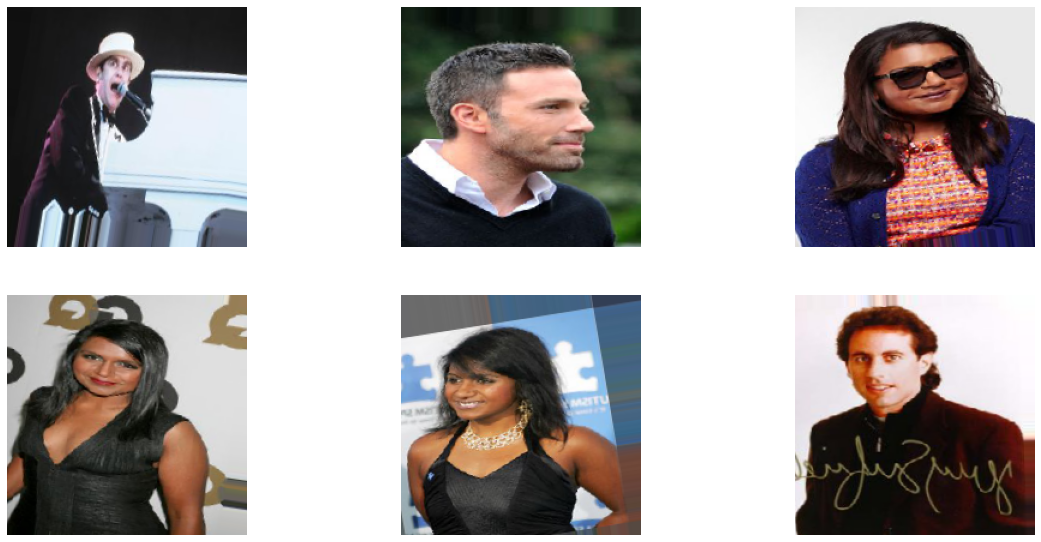

In [5]:
import matplotlib.pyplot as plt
# Collage de las imágenes generadas
fig = plt.figure(figsize=(20, 15))
for i in range(6):
    #batch=next(train_generator) # returns the next batch of images and labels 
    # define subplot
    fig.add_subplot(330 + 1 + i)
    # generate batch of images
    # convert to unsigned integers for viewing
    image = batch[0][i]
    plt.imshow(image)
    # plot raw pixel data
    #plt.imshow(image)
    plt.axis('off')
    # show the figure
plt.show()

## 4. CNN preentrenadas

En este apartado se hace uso de una red preentrenada llamada 'vgg16CNNtl' y que tiene la función 'vgg16CNNtl()' en la clase CNN. Para realizar el entrenamiento de la misma es necesario llamar a la función 'train' de la clase CNN y meterle como argumentos los parámetros necesarios con sus valores correspondientes (train_data_dir, validation_data_dir, model, dropout, epochs, learning_rate and decay). 

En este trabajo, hemos querido explorar cómo la variación de diferentes parámetros pueden afectar en la precisión de nuestro modelo. Es por ello por lo que en los siguientes apartados se estudia la influencia de diferentes valores de dropout (0.5 y 0.2) en el modelo preentrenado 'vggCNNtl' así como de learning rate (1e-5,1e-2) y el decay (1e-7,1e-3). 

### Dropout 0.5

En este primer caso, como se ha comentado anteriormente, se ha querido ver la influencia que tiene un valor del dropout de 0.5 en la precisión de nuestro modelo. Para ello, aunque ya hemos entrenado el modelo y lo hemos guardado, en la siguiente celda se muestra los comandos que han de ser ejecutados para entrenar el modelo variando alguno de los parametros que se recogen en los argumentos de la función 'train' de la clase CNN. Aclarar que los métodos 'train' y 'save' se recomiendan usar en la misma celda para poder asegurar que el modelo se ha guardado correctamente. Y posteriormente si se quiere hacer uso del modelo entrenado y guardado, es necesario hacer uso de la función 'load_model' para tener el modelo en una variable y poder finalmente ejecutar la función 'test'.

Por tanto, en caso de querer entrenar la red, los pasos a seguir se recogen en la siguiente celda donde los resultados obtenidos por cada epoch se muestran en pantalla así como los gráficos de pérdida y de presición de ambos conjuntos de datos (validación y entrenamiento). Además, con la función 'save' de la clase CNN se guarda el modelo en formato .h5 de manera que se pueda cargar sin necesidad de tener que entrenar la red de nuevo (este caso se muestra más adelante con la función 'load_model' de keras). Además, al llamar a la función train, los resultados y lo gráficos de pérdida y de precisión se guardan en una imagen en formato .png de manera que si queremos ver los resultados únicamente tenemos que cargar la imagen para ello.

In [ ]:
cnn.train(train_data_dir = train_data_dir, validation_data_dir = validation_data_dir, model = 'vgg16CNNtl', dropout = 0.5, epochs = 50, learning_rate = 1e-5, decay = 1e-7)
cnn.save('archive/models/vgg16CNNtl_dropout05_LR1e-5_decay1e-7')

En caso de no querer entrenar la red de nuevo y siempre y cuando los datos de nuestro modelo tras haberlo entrenado se hayan guardado correctamente, es posible subir tanto el modelo como los gráficos anteriormente mencionados para analizar los resultados. En la siguiente celda se carga el modelo y se guarda en la variable model_1 con el fin de probar el funcionamiento del modelo más adelante con nuestros datos de validación. Posteriormente, se cargan los gráficos correspondientes a este mismo modelo para poder analizar los resultados.

In [6]:
from keras.models import load_model
model_1 = load_model('archive/models/vgg16CNNtl_dropout05_LR1e-5_decay1e-7.h5')

In [ ]:
Los gráficos correspondientes a la pérdida y a la precisión del set de entrenamiento vs Epochs y las precisiones de ambos sets se muestran a continuación:

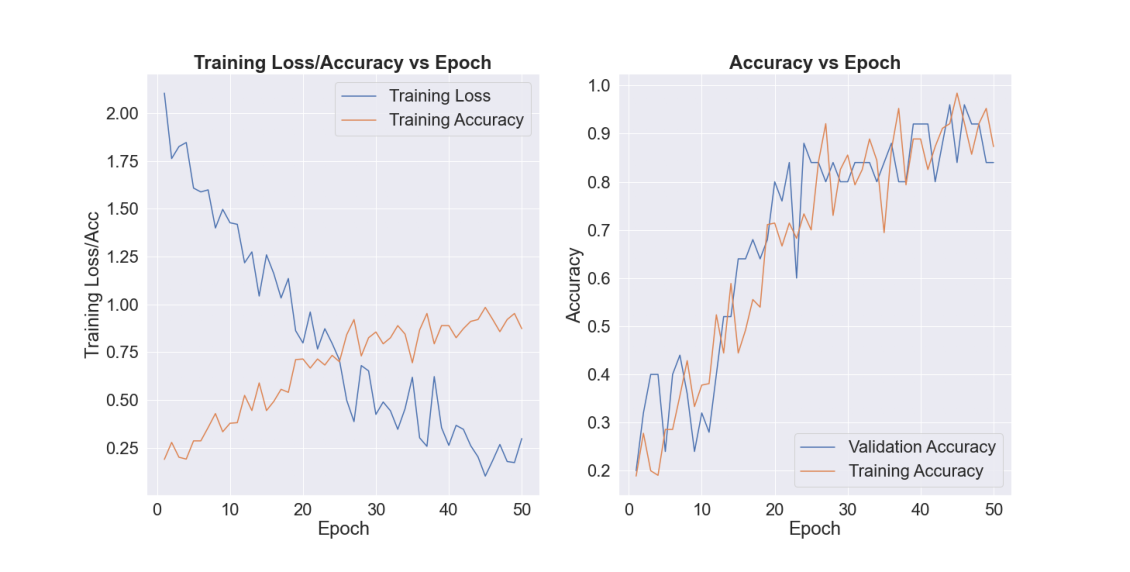

In [7]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
img = mpimg.imread('archive/models/vgg16CNNtl_dropout05_LR1e-5_decay1e-7_history.png')
imgplot = plt.imshow(img)
plt.axis("off")
plt.show()

El modelo 'model_1' cargado anteriormente se puede usar para validarlo ejecutando la siguiente celda donde se usa la función 'test' de la clase CNN para probar su funcionamiento con algunas muestras de validación. Vemos que la función devuelve una imagen con la clase a la que más se parece y el porcentaje de parecido a la misma. 

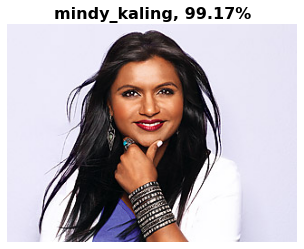

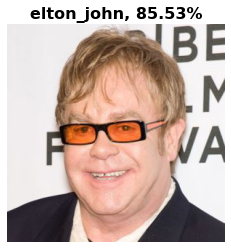

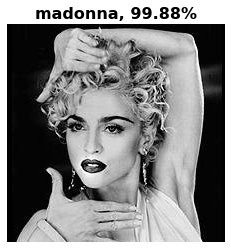

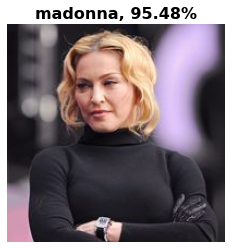

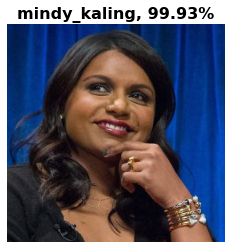

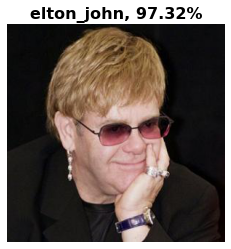

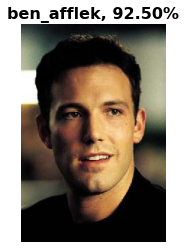

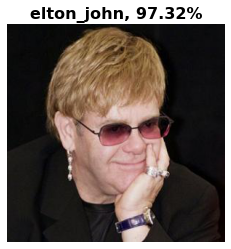

In [8]:
# Se obtiene una muestra de como funciona el modelo.
cnn.test(model = model_1)

### Dropout 0.2

En este primer caso, como se ha comentado anteriormente, se ha querido ver la influencia que tiene un valor del dropout de 0.2 en la precisión de nuestro modelo. Para ello, aunque ya hemos entrenado el modelo y lo hemos guardado, en la siguiente celda se muestra los comandos que han de ser ejecutados para entrenar el modelo variando alguno de los parametros que se recogen en los argumentos de la función 'train' de la clase CNN.

Por tanto, en caso de querer entrenar la red, los pasos a seguir se recogen en la siguiente celda donde los resultados obtenidos por cada epoch se muestran en pantalla así como los gráficos de pérdida y de presición de ambos conjuntos de datos (validación y entrenamiento). Además, con la función 'save' de la clase CNN se guarda el modelo en formato .h5 de manera que se pueda cargar sin necesidad de tener que entrenar la red de nuevo (este caso se muestra más adelante con la función 'load_model' de keras). Además, al llamar a la función train, los resultados y lo gráficos de pérdida y de precisión se guardan en una imagen en formato .png de manera que si queremos ver los resultados únicamente tenemos que cargar la imagen para ello.



In [ ]:
cnn.train(train_data_dir = train_data_dir, validation_data_dir = validation_data_dir, model = 'vgg16CNNtl', dropout = 0.2, epochs = 50, learning_rate = 1e-5, decay = 1e-7)
cnn.save('archive/models/vgg16CNNtl_dropout02_LR1e-5_decay1e-7')

En caso de no querer entrenar la red de nuevo y siempre y cuando los datos de nuestro modelo tras haberlo entrenado se hayan guardado correctamente, es posible subir tanto el modelo como los gráficos anteriormente mencionados para analizar los resultados. En la siguiente celda se carga el modelo y se guarda en la variable model_2 con el fin de probar el funcionamiento del modelo más adelante con nuestros datos de validación. Posteriormente, se cargan los gráficos correspondientes a este mismo modelo para poder analizar los resultados.

In [9]:
model_2 = load_model('archive/models/vgg16CNNtl_dropout02_LR1e-5_decay1e-7.h5')

Los gráficos correspondientes a la pérdida y a la precisión del set de entrenamiento vs Epochs y las precisiones de ambos sets se muestran a continuación:

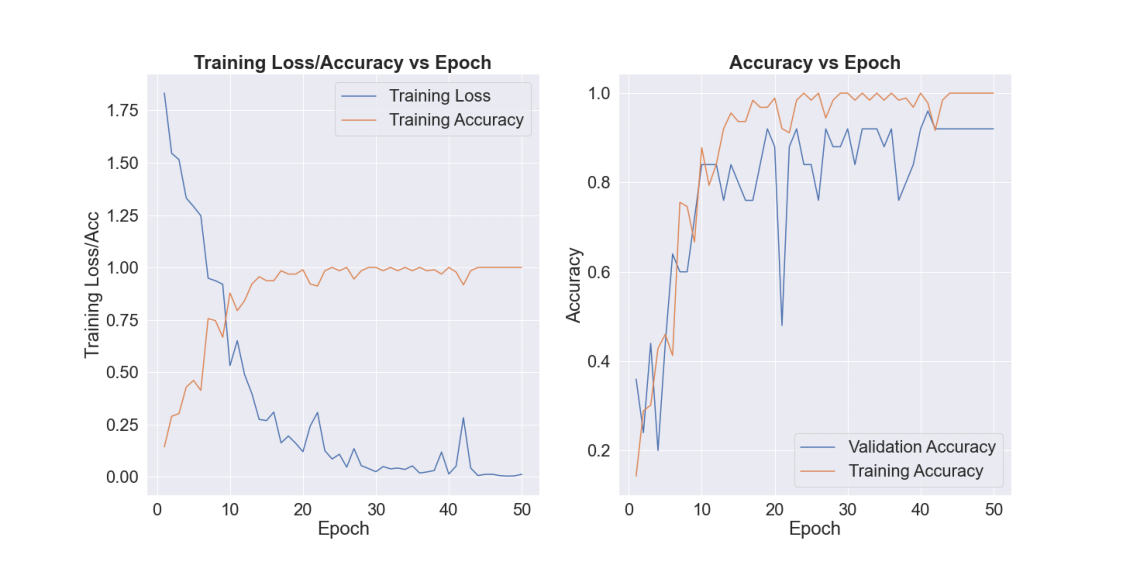

In [10]:
plt.figure(figsize=(20,20))
img = mpimg.imread('archive/models/vgg16CNNtl_dropout02_LR1e-5_decay1e-7_history.png')
imgplot = plt.imshow(img)
plt.axis("off")
plt.show()

El modelo 'model_2' cargado anteriormente se puede usar para validarlo ejecutando la siguiente celda donde se usa la función 'test' de la clase CNN para probar su funcionamiento con algunas muestras de validación. Vemos que la función devuelve una imagen con la clase a la que más se parece y el porcentaje de parecido a la misma. 

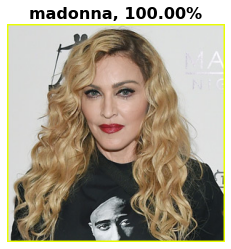

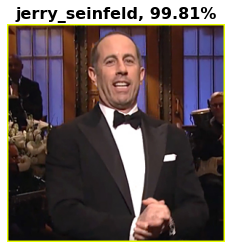

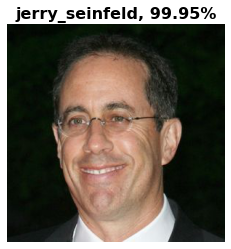

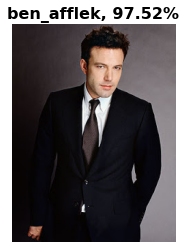

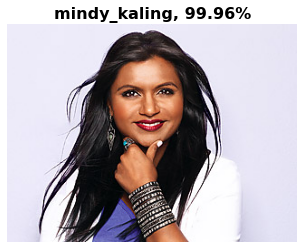

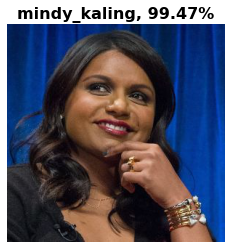

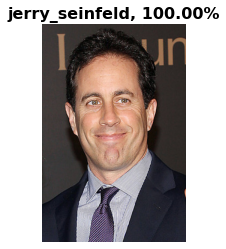

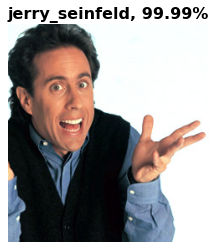

In [11]:
# Se obtiene una muestra de como funciona el modelo.
cnn.test(model = model_2)

Observando los resultados de ambos modelos: 'model_1' y 'model_2' se puede ver que los resultados más óptimos se obtienen en el primer modelo. Vemos que al aumentar el valor del dropout el overfitting disminuye llegando incluso a valores muy parecidos a la precisión de validación. Sin embargo, en el segundo caso, con un dropout de 0.2 se puede ver que el overfitting es muy significativo y la precisión empeora. Por tanto, se puede concluir que un mayor valor de dropout reduce el overfitting existente con un dropout de 0.2

### Learning Rate 1e-2 

En este caso exploraremos cómo el learning rate puede influir en nuestros resultados (precisión y función de pérdida). Como se comentó anteriormente, se explorarán tanto los valores de 1e-5 como de 1e-2. Sin embargo, el caso de 1e-5 se aplica en el model_1. Por tanto, en este caso exploraremos los resultados al usar un learning rate de 1e-2 manteniendo el valor de dropout más óptimo obtenido anteriormente (0.5).

In [ ]:
cnn.train(train_data_dir = train_data_dir, validation_data_dir = validation_data_dir, model = 'vgg16CNNtl', dropout = 0.5, epochs = 50, learning_rate = 1e-2, decay = 1e-7)
cnn.save('archive/models/vgg16CNNtl_dropout05_LR1e-2_decay1e-7')

In [12]:
# Carga del tercer modelo
model_3 = load_model('archive/models/vgg16CNNtl_dropout05_LR1e-2_decay1e-7.h5')

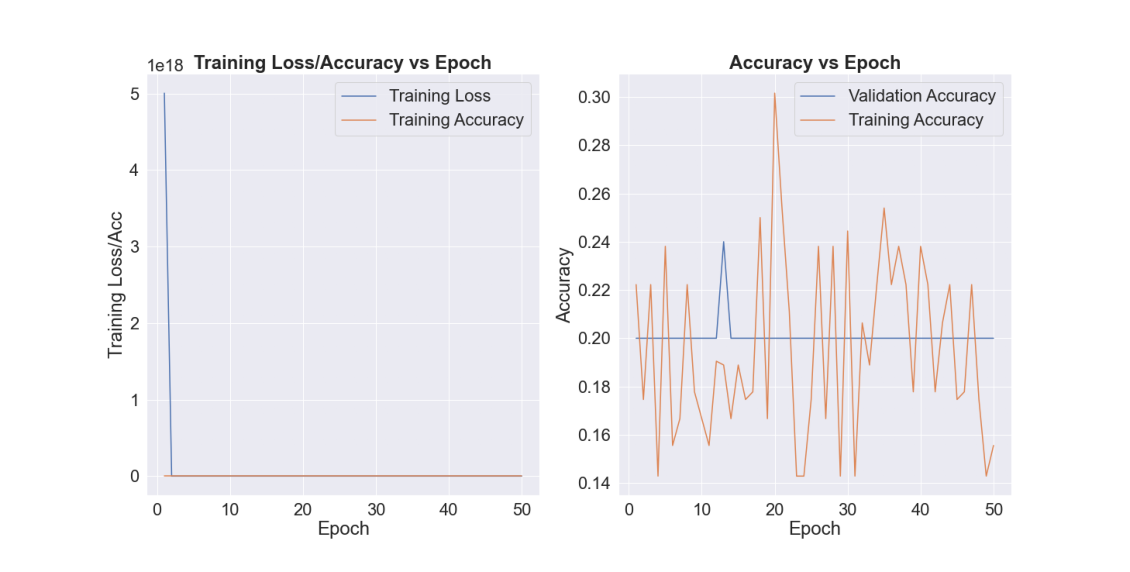

In [13]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
img = mpimg.imread('archive/models/vgg16CNNtl_dropout05_LR1e-2_decay1e-7_history.png')
imgplot = plt.imshow(img)
plt.axis("off")
plt.show()

Como se puede observar en los resultados de entrenar el modelo con un learning rate más bajo son peores que teniendo el learning rate anterior de 1e-5. Aún así se realiza la prueba del modelo hasta el final y en la siguiente celda se ejecuta la funcion test para observar la predicción de 8 imágenes escogidas al azar.

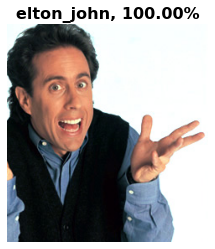

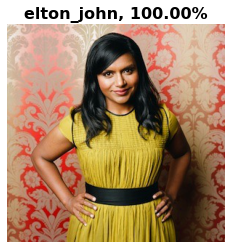

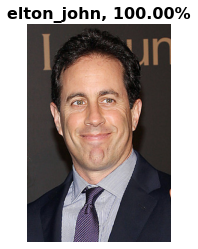

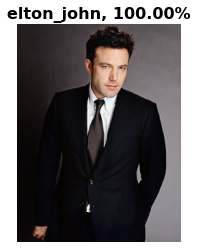

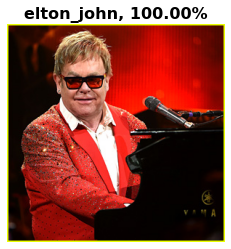

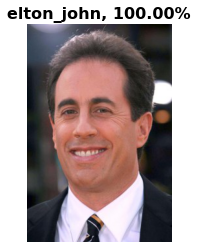

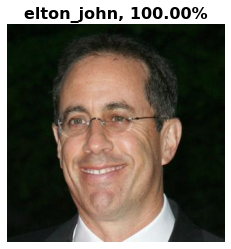

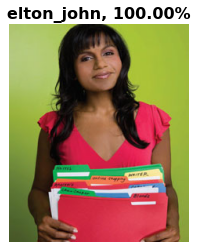

In [14]:
# Se obtiene una muestra de como funciona el modelo.
cnn.test(model = model_3)

### Decay 1e-3

Por último, se explora cómo la variable decay influye en nuestros resultados (precisión y función de pérdida). Durante el entrenamiento de todos los modelos anteriores se estaba usando un decay de 1e-7 y en el siguiente entrenamiento se utilizará un decay de 1e-3. En los anteriores entrenamientos se ha comprobado que los valores para dropout y learning rate eran 0.5 y 1e-5 respectivamente (model_1), por lo que esos parámetro se mantendrán.

Found 93 images belonging to 5 classes.
Found 25 images belonging to 5 classes.
Epoch 1/50
3/3 [==============================] - 67s 22s/step - loss: 2.1558 - accuracy: 0.2000 - val_loss: 1.6209 - val_accuracy: 0.2800
Epoch 2/50
3/3 [==============================] - 45s 15s/step - loss: 1.8706 - accuracy: 0.2540 - val_loss: 1.5816 - val_accuracy: 0.2400
Epoch 3/50
3/3 [==============================] - 46s 15s/step - loss: 1.4648 - accuracy: 0.3492 - val_loss: 1.6433 - val_accuracy: 0.2000
Epoch 4/50
3/3 [==============================] - 46s 15s/step - loss: 1.8792 - accuracy: 0.2698 - val_loss: 1.5564 - val_accuracy: 0.3200
Epoch 5/50
3/3 [==============================] - 60s 20s/step - loss: 1.5616 - accuracy: 0.3111 - val_loss: 1.5263 - val_accuracy: 0.2800
Epoch 6/50
3/3 [==============================] - 46s 15s/step - loss: 1.6114 - accuracy: 0.3651 - val_loss: 1.5396 - val_accuracy: 0.3200
Epoch 7/50
3/3 [==============================] - 45s 15s/step - loss: 1.6853 - accura

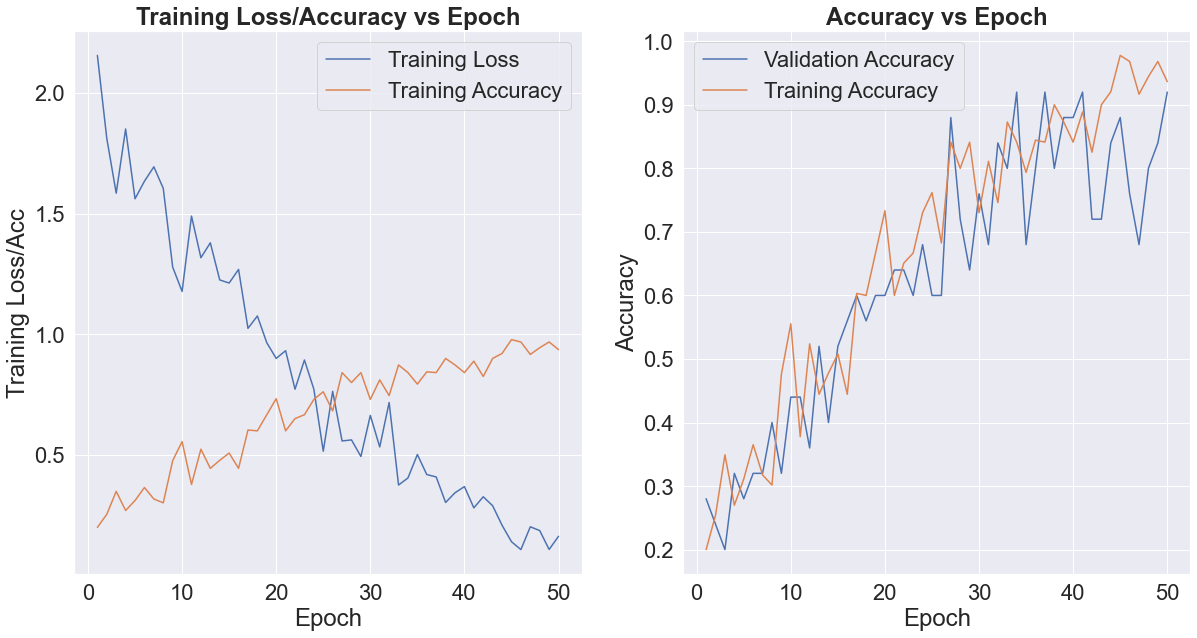

In [15]:
cnn.train(train_data_dir = train_data_dir, validation_data_dir = validation_data_dir, model = 'vgg16CNNtl', dropout = 0.5, epochs = 50, learning_rate = 1e-5, decay = 1e-3)
cnn.save('archive/models/vgg16CNNtl_dropout05_LR1e-5_decay1e-3')

In [16]:
# Carga del tercer modelo
model_4 = load_model('archive/models/vgg16CNNtl_dropout05_LR1e-5_decay1e-3.h5')

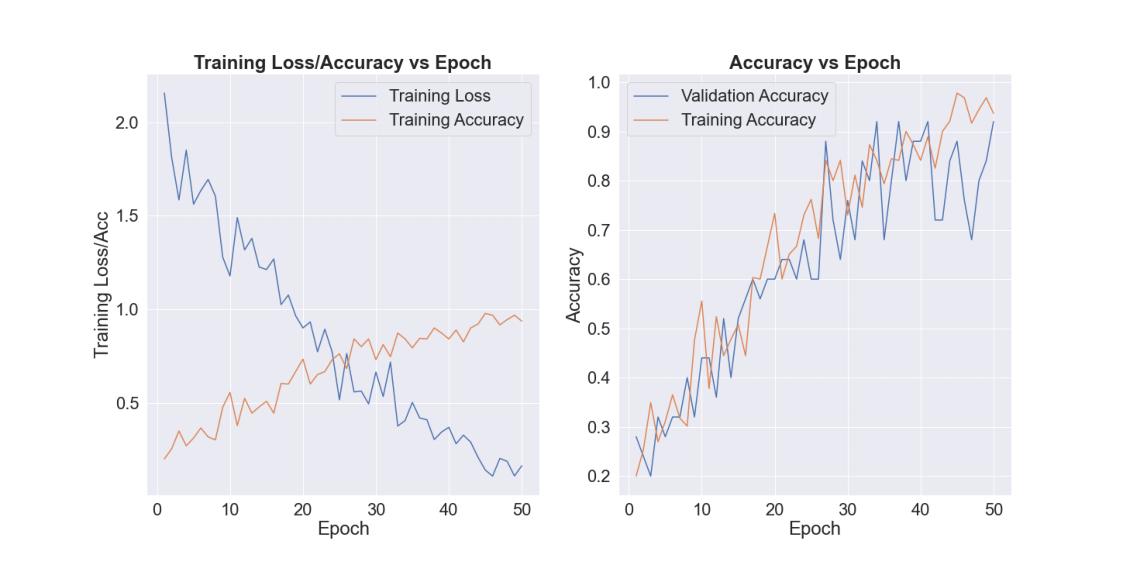

In [18]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
img = mpimg.imread('archive/models/vgg16CNNtl_dropout05_LR1e-5_decay1e-3_history.png')
imgplot = plt.imshow(img)
plt.axis("off")
plt.show()

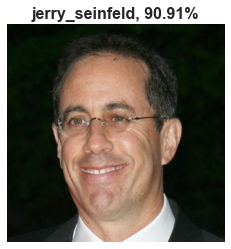

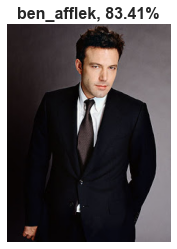

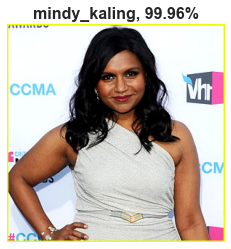

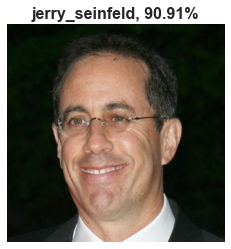

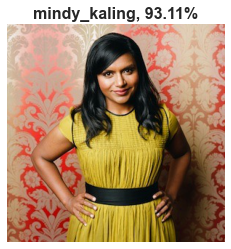

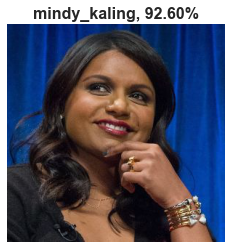

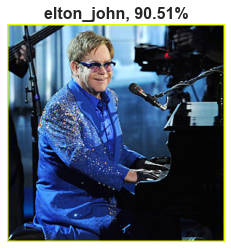

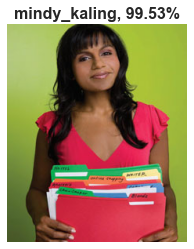

In [19]:
# Se obtiene una muestra de como funciona el modelo.
cnn.test(model = model_4)

## 5. Clustering

En este apartado se hace uso de una red preentrenada que funciona como un sistema de reconocimiento de caras llamada 'facenet'. Este sistema lo que hace es extraer características de alta calidad de la cara que se le muestra en cada una de las fotos y predecir un vector de 128 elementos que representa estas características llamado conocido como 'embedding'. A partir de los embeddings creados por esta red se ha tratado de clusterizar caras similares a partir de datos de entrenamiento. Estos datos de altas dimensiones se han clusterizado a partir de una técnica de reducción de dimensionalidad llamada PCA. Esta técnica trata de reducir la dimensionalidad de nuestros datos manteniendo siempre su información. 

Además, se han usado las modelos entrenados anteriormente para ver cómo clusterizan nuestros datos a partir de la técnica anteriormente mencionada. De esta manera, podremos comparar los resultados obtenidos y analizar cada uno de los casos.

En la siguiente celda se crea una instancia de nuestra clase CLUSTERING que se encuentra en nuestro archivo 'clustering.py'. Para saber con más detalle cómo está definida esta clase se puede encontrar toda la información en el archivo anteriormente mencionado.

In [20]:
# Carga de la clase y creación de la instancia
from clustering import CLUSTERING
clust = CLUSTERING()

Instancia de la clase CLUSTERING creada


### Facenet_keras.h5


En primer lugar, llamaremos a la función train definida en nuestra clase CLUSTERING y le pasaremos como argumentos el modelo que queremos usar para realizar el clustering, en este caso el modelo 'facenet_keras.h5' y la dirección donde se encuentra el mismo.

loaded 14 sample for class: ben_afflek
loaded 17 sample for class: elton_john
loaded 21 sample for class: jerry_seinfeld
loaded 19 sample for class: madonna
loaded 22 sample for class: mindy_kaling
(93, 160, 160, 3) (93,)
loaded 5 sample for class: ben_afflek
loaded 5 sample for class: elton_john
loaded 5 sample for class: jerry_seinfeld
loaded 5 sample for class: madonna
loaded 5 sample for class: mindy_kaling
(25, 160, 160, 3) (25,)
C:\Users\Guillermo\anaconda3\envs\env_image\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
Loaded Model
[<tf.Tensor 'input_1_3:0' shape=(None, 160, 160, 3) dtype=float32>]
[<tf.Tensor 'Bottleneck_BatchNorm/cond/Identity:0' shape=(None, 128) dtype=float32>]
(93, 128)
(25, 128)
(93, 2)


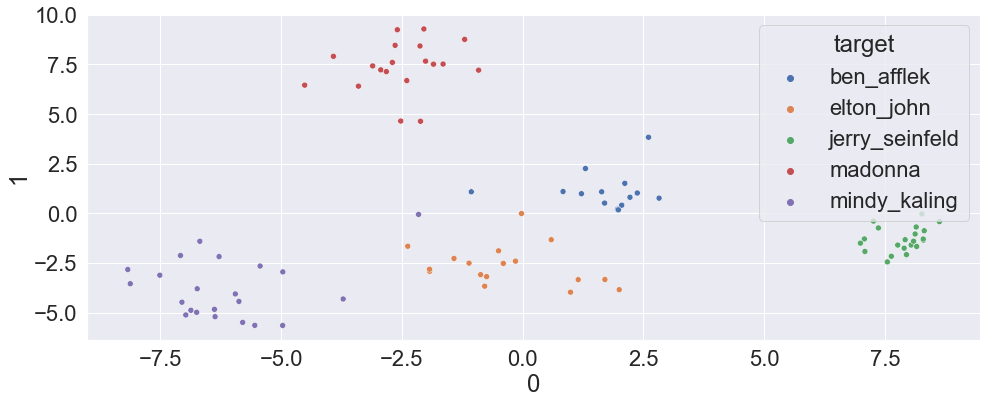

In [21]:
# Entrenar facenet
clust.train(base_model = 'facenet_keras.h5', dir_model= 'archive/models/')

Vemos cómo con este modelo se pueden distinguir de manera diferenciada 3 clústers diferentes que se corresponden con las clases: jerry_seinfield, madonna y mindy_kailing. Sin embargo, vemos que para el resto de clases, los clústers están más solapados. Sin embargo, se puede ver que aun estando solapados los clústeres están bien definidos y se pueden distinguir fácilmente. Es importante destacar que la clase de barack_obama es la que según los resultos parece estar peor definida pues la nube de puntos del clúster correspondiente es más amplia y menos robusta que el resto.

### VGG16CNN models

En segundo lugar, llamaremos a la función train definida en nuestra clase CLUSTERING y le pasaremos como argumentos los modelos que queremos usar para realizar el clustering: 'vgg16CNNtl_dropout05_LR1e-5_decay1e-3.h5' y 'vgg16CNNtl_dropout05_LR1e-5_decay1e-5.h5' y la dirección donde se encuentra cada uno para cada caso.

loaded 14 sample for class: ben_afflek
loaded 17 sample for class: elton_john
loaded 21 sample for class: jerry_seinfeld
loaded 19 sample for class: madonna
loaded 22 sample for class: mindy_kaling
(93, 200, 200, 3) (93,)
loaded 5 sample for class: ben_afflek
loaded 5 sample for class: elton_john
loaded 5 sample for class: jerry_seinfeld
loaded 5 sample for class: madonna
loaded 5 sample for class: mindy_kaling
(25, 200, 200, 3) (25,)
Loaded Model
[<tf.Tensor 'input_1_4:0' shape=(None, 200, 200, 3) dtype=float32>]
[<tf.Tensor 'sequential_1_3/dense_3/Softmax:0' shape=(None, 5) dtype=float32>]
(93, 5)
(25, 5)
(93, 2)


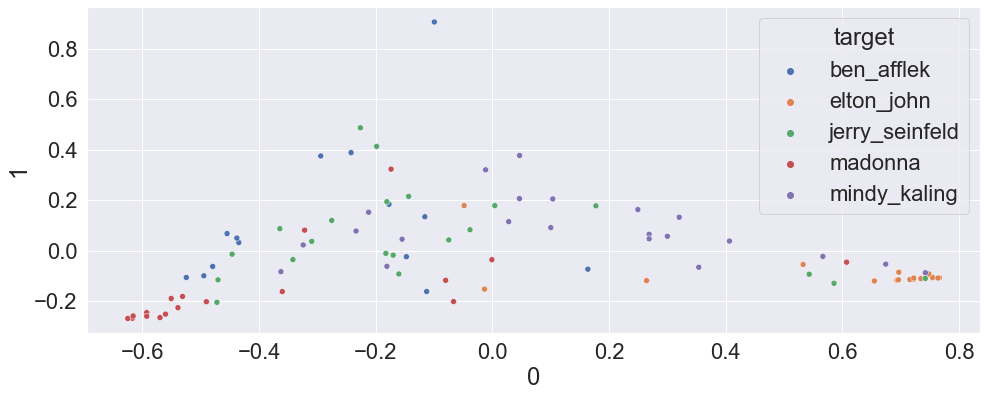

In [22]:
clust.train(base_model = 'vgg16CNNtl_dropout05_LR1e-5_decay1e-3.h5', dir_model= 'archive/models/')

loaded 14 sample for class: ben_afflek
loaded 17 sample for class: elton_john
loaded 21 sample for class: jerry_seinfeld
loaded 19 sample for class: madonna
loaded 22 sample for class: mindy_kaling
(93, 200, 200, 3) (93,)
loaded 5 sample for class: ben_afflek
loaded 5 sample for class: elton_john
loaded 5 sample for class: jerry_seinfeld
loaded 5 sample for class: madonna
loaded 5 sample for class: mindy_kaling
(25, 200, 200, 3) (25,)
Loaded Model
[<tf.Tensor 'input_1_5:0' shape=(None, 200, 200, 3) dtype=float32>]
[<tf.Tensor 'sequential_1_4/dense_3/Softmax:0' shape=(None, 5) dtype=float32>]
(93, 5)
(25, 5)
(93, 2)


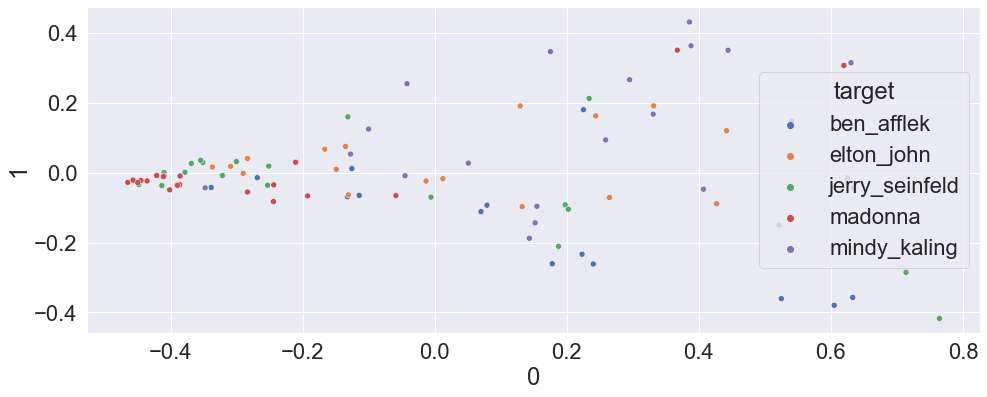

In [25]:
clust.train(base_model = 'vgg16CNNtl_dropout05_LR1e-5_decay1e-7.h5', dir_model= 'archive/models/')

Observando los resultados podemos observar que los resultados obtenidos para nuestro modelo no son óptimos. Las razones por las que esto puede ocurrir pueden ser:

- El modelo facenet usado para el primer caso ha sido entrenado con unas imágenes en concreto y con un tamaño determinado. A pesar de que el tamaño de las imágenes se pueden cambiar de tamaño puede que los datos que se les están proporcionando afecten la performance de nuestro modelo.

- El tiempo de entrenamiento de la red FaceNet frente al tiempo empleado para el entrenamiento de las redes usadas VGG16 es probable que haya sido considerablemente mayor al empleado para nuestros modelos.

Sin embargo, consideramos que si usáramos la red y la entrenaramos con nuestras fotos y cambiáramos los parámetros hasta encontrar valores óptimos podría llevarnos a mejores resultados.